In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Datasets\\TrafficSigns\\Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [2]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [3]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 22s 20ms/step - loss: 1.7986 - accuracy: 0.5453 - val_loss: 0.3987 - val_accuracy: 0.9031
Epoch 2/15
981/981 [==============================] - 16s 16ms/step - loss: 0.5691 - accuracy: 0.8382 - val_loss: 0.1563 - val_accuracy: 0.9579
Epoch 3/15
981/981 [==============================] - 16s 16ms/step - loss: 0.3852 - accuracy: 0.8908 - val_loss: 0.1671 - val_accuracy: 0.9507
Epoch 4/15
981/981 [==============================] - 16s 16ms/step - loss: 0.3193 - accuracy: 0.9116 - val_loss: 0.0906 - val_accuracy: 0.9759
Epoch 5/15
981/981 [==============================] - 15s 16ms/step - loss: 0.2815 - accuracy: 0.9214 - val_loss: 0.0839 - val_accuracy: 0.9753
Epoch 6/15
981/981 [==============================] - 16s 16ms/step - loss: 0.2642 - accuracy: 0.9274 - val_loss: 0.0904 - val_accuracy: 0.9770
Epoch 7/15
981/981 [==============================] - 16s 16ms/step - loss: 0.2417 - accuracy: 0.9342 - val_loss: 0.0836 - val_accuracy:

C:\Users\Admin\PycharmProjects\machine_learning_mirea\MIREA\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


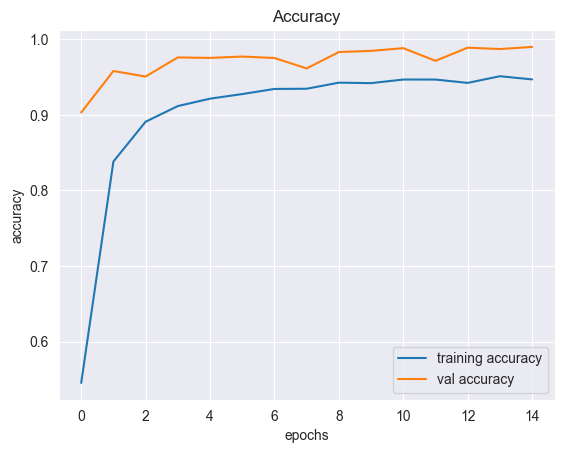

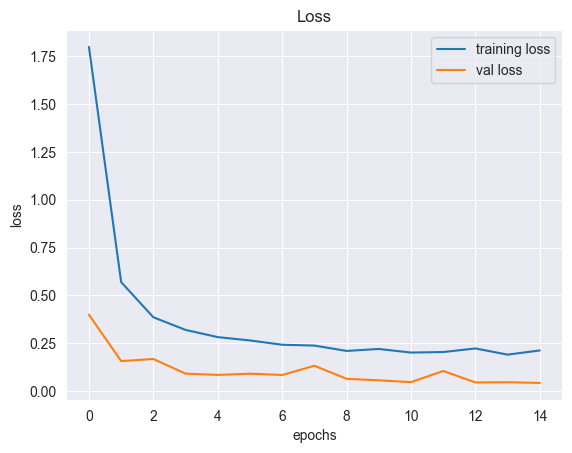

In [5]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [6]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Datasets/TrafficSigns/Test.csv')

labels = y_test["ClassId"].values
y_test["Path"] = 'Datasets/TrafficSigns/' + y_test["Path"]
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

#pred = model.predict(X_test)
# Use numpy's 'argmax' function to get the class predictions
#class_predictions = np.argmax(pred, axis=-1)
#print(class_predictions)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
#print(accuracy_score(labels, class_predictions))

#model.save('traffic_classifier.h5')

In [7]:
y_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Datasets/TrafficSigns/Test/00000.png
1,42,45,5,5,36,40,1,Datasets/TrafficSigns/Test/00001.png
2,48,52,6,6,43,47,38,Datasets/TrafficSigns/Test/00002.png
3,27,29,5,5,22,24,33,Datasets/TrafficSigns/Test/00003.png
4,60,57,5,5,55,52,11,Datasets/TrafficSigns/Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Datasets/TrafficSigns/Test/12625.png
12626,50,51,6,5,45,46,33,Datasets/TrafficSigns/Test/12626.png
12627,29,29,6,6,24,24,6,Datasets/TrafficSigns/Test/12627.png
12628,48,49,5,6,43,44,7,Datasets/TrafficSigns/Test/12628.png


In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Преобразование изображений в одномерные массивы
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print("TrainTest complete")

# Создание и обучение модели дерева решений
dt_classifier = DecisionTreeClassifier(random_state=42)
print("Fitting model start")
# Обучение модели без использования GridSearchCV
dt_classifier.fit(X_train_flat, y_train.argmax(axis=1))
print("Fitting model finish")
# Предсказание на тестовом наборе данных
y_pred = dt_classifier.predict(X_test_flat)

# Оценка качества модели
accuracy = accuracy_score(labels, y_pred)
print("Accuracy on Test Data:", accuracy)

# Вывод отчета о классификации и матрицы ошибок
print("\nClassification Report:")
print(classification_report(labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(labels, y_pred))

TrainTest complete
Fitting model start
Fitting model finish
Accuracy on Test Data: 0.5779889152810768

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.13      0.16        60
           1       0.61      0.65      0.63       720
           2       0.52      0.64      0.57       750
           3       0.42      0.48      0.45       450
           4       0.50      0.51      0.50       660
           5       0.36      0.37      0.36       630
           6       0.36      0.25      0.29       150
           7       0.35      0.41      0.38       450
           8       0.35      0.34      0.35       450
           9       0.73      0.64      0.68       480
          10       0.78      0.76      0.77       660
          11       0.68      0.66      0.67       420
          12       0.79      0.79      0.79       690
          13       0.82      0.86      0.84       720
          14       0.77      0.69      0.73       270
         

In [10]:
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Преобразование меток в одномерные массивы (CatBoost требует использования числовых меток)
y_train_flat = y_train.argmax(axis=1)

# XGBoost
# xgb_classifier = xgb.XGBRFClassifier(objective='multi:softmax', num_class=43, random_state=42)
# xgb_classifier.fit(X_train_flat, y_train_flat)
# xgb_pred = xgb_classifier.predict(X_test_flat)

# CatBoost
print("catboost")
cat_classifier = CatBoostClassifier(iterations=5, depth=10, learning_rate=0.1, loss_function='MultiClass', random_seed=42, verbose=True)
cat_classifier.fit(X_train_flat, y_train_flat)
cat_pred = cat_classifier.predict(X_test_flat)

catboost
0:	learn: 3.2745034	total: 3m 18s	remaining: 13m 13s


KeyboardInterrupt: 

In [65]:
print("\nCatBoost Accuracy:", accuracy_score(labels, cat_pred))
print("\nCatBoost Classification Report:")
print(classification_report(labels, cat_pred))
print("\nCatBoost Confusion Matrix:")
print(confusion_matrix(labels, cat_pred))


CatBoost Accuracy: 0.4102929532858274

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.23      0.28      0.25       720
           2       0.13      0.53      0.21       750
           3       0.24      0.29      0.26       450
           4       0.41      0.30      0.34       660
           5       0.22      0.17      0.19       630
           6       0.38      0.04      0.07       150
           7       0.63      0.29      0.40       450
           8       0.26      0.36      0.30       450
           9       0.54      0.68      0.60       480
          10       0.56      0.67      0.61       660
          11       0.68      0.76      0.72       420
          12       0.81      0.49      0.61       690
          13       0.66      0.85      0.74       720
          14       0.89      0.55      0.68       270
          15       0.00      0.00      0.00       210
         

C:\Users\Admin\PycharmProjects\machine_learning_mirea\MIREA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\PycharmProjects\machine_learning_mirea\MIREA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\PycharmProjects\machine_learning_mirea\MIREA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [57]:
# LightGBM
print("light")
lgb_classifier = LGBMClassifier(objective='multiclass', num_class=43, random_state=42)
lgb_classifier.fit(X_train_flat, y_train_flat)
lgb_pred = lgb_classifier.predict(X_test_flat)

# Оценка качества моделей
# print("XGBoost Accuracy:", accuracy_score(labels, xgb_pred))
# print("\nXGBoost Classification Report:")
# print(classification_report(labels, xgb_pred))
# print("\nXGBoost Confusion Matrix:")
# print(confusion_matrix(labels, xgb_pred))

print("\nLightGBM Accuracy:", accuracy_score(labels, lgb_pred))
print("\nLightGBM Classification Report:")
print(classification_report(labels, lgb_pred))
print("\nLightGBM Confusion Matrix:")
print(confusion_matrix(labels, lgb_pred))

light
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.979434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 679668
[LightGBM] [Info] Number of data points in the train set: 31367, number of used features: 2700
[LightGBM] [Info] Start training from score -5.206017
[LightGBM] [Info] Start training from score -2.901109
[LightGBM] [Info] Start training from score -2.857970
[LightGBM] [Info] Start training from score -3.323539
[LightGBM] [Info] Start training from score -2.999789
[LightGBM] [Info] Start training from score -3.042962
[LightGBM] [Info] Start training from score -4.464634
[LightGBM] [Info] Start training from score -3.295614
[LightGBM] [Info] Start training from score -3.342298
[LightGBM] [Info] Start training from score -3.261770
[LightGBM] [Info] Start training from score -2.951060
[LightGBM] [Info] Start training from score -3.365098
[LightGBM] [Info] Start training from score -2.944981

C:\Users\Admin\PycharmProjects\machine_learning_mirea\MIREA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\PycharmProjects\machine_learning_mirea\MIREA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\PycharmProjects\machine_learning_mirea\MIREA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("started fit")
# Создание и обучение модели случайного леса
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_flat, y_train_flat)

# Предсказание на тестовом наборе данных
rf_pred = rf_classifier.predict(X_test_flat)

# Оценка качества модели
print("Random Forest Accuracy:", accuracy_score(labels, rf_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(labels, rf_pred))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(labels, rf_pred))

started fit
Random Forest Accuracy: 0.7786223277909738

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.25      0.39        60
           1       0.67      0.85      0.75       720
           2       0.58      0.74      0.65       750
           3       0.59      0.64      0.61       450
           4       0.72      0.75      0.74       660
           5       0.55      0.62      0.58       630
           6       0.62      0.50      0.56       150
           7       0.66      0.71      0.69       450
           8       0.64      0.44      0.52       450
           9       0.94      0.86      0.90       480
          10       0.90      0.96      0.93       660
          11       0.86      0.95      0.90       420
          12       0.97      0.90      0.93       690
          13       0.96      0.99      0.97       720
          14       0.97      1.00      0.98       270
          15       0.94      0.90      0.9

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
import lightgbm as lgb

print("1. Base models ...")
# Создание базовых моделей
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
# 'xgb', xgb.XGBClassifier(objective='multi:softmax', num_class=43, random_state=42)
base_models = [
    ('catboost', CatBoostClassifier(iterations=10, depth=8, learning_rate=0.2, loss_function='MultiClass', random_seed=42)),
    ('lgbm', lgb.LGBMClassifier(objective='multiclass', num_class=43, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]
print("2. Base models created")
print("3. Meta model ...")
# Создание мета-модели
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("4. Meta model created")
print("5. Stacking model ...")
# Создание модели стекинга
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
print("6. Stacking model created")
print("7. Start fit stacking model")
# Обучение модели стекинга
stacking_model.fit(X_train_flat, y_train_flat)
print("8. Stacking model fitted")

# Предсказание на тестовом наборе данных
stacking_pred = stacking_model.predict(X_test_flat)

# Оценка качества модели
print("Stacking Accuracy:", accuracy_score(labels, stacking_pred))
print("\nStacking Classification Report:")
print(classification_report(labels, stacking_pred))
print("\nStacking Confusion Matrix:")
print(confusion_matrix(labels, stacking_pred))

1. Base models ...
2. Base models created
3. Meta model ...
4. Meta model created
5. Stacking model ...
6. Stacking model created
7. Start fit stacking model


In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
import numpy as np
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

#dictionary to label all traffic signs class.
# classes = { 1:'Speed limit (20km/h)',
#             2:'Speed limit (30km/h)', 
#             3:'Speed limit (50km/h)', 
#             4:'Speed limit (60km/h)', 
#             5:'Speed limit (70km/h)', 
#             6:'Speed limit (80km/h)', 
#             7:'End of speed limit (80km/h)', 
#             8:'Speed limit (100km/h)', 
#             9:'Speed limit (120km/h)', 
#             10:'No passing', 
#             11:'No passing veh over 3.5 tons', 
#             12:'Right-of-way at intersection', 
#             13:'Priority road', 
#             14:'Yield', 
#             15:'Stop', 
#             16:'No vehicles', 
#             17:'Veh > 3.5 tons prohibited', 
#             18:'No entry', 
#             19:'General caution', 
#             20:'Dangerous curve left', 
#             21:'Dangerous curve right', 
#             22:'Double curve', 
#             23:'Bumpy road', 
#             24:'Slippery road', 
#             25:'Road narrows on the right', 
#             26:'Road work', 
#             27:'Traffic signals', 
#             28:'Pedestrians', 
#             29:'Children crossing', 
#             30:'Bicycles crossing', 
#             31:'Beware of ice/snow',
#             32:'Wild animals crossing', 
#             33:'End speed + passing limits', 
#             34:'Turn right ahead', 
#             35:'Turn left ahead', 
#             36:'Ahead only', 
#             37:'Go straight or right', 
#             38:'Go straight or left', 
#             39:'Keep right', 
#             40:'Keep left', 
#             41:'Roundabout mandatory', 
#             42:'End of no passing', 
#             43:'End no passing veh > 3.5 tons' }

classes = { 1:'Ограничение скорости (20 км/ч)',
            2:'Ограничение скорости (30 км/ч)', 
            3:'Ограничение скорости (50 км/ч)', 
            4:'Ограничение скорости (60 км/ч)', 
            5:'Ограничение скорости (70 км/ч)', 
            6:'Ограничение скорости (80 км/ч)', 
            7:'Конец ограничения скорости (80 км/ч)', 
            8:'Ограничение скорости (100 км/ч)', 
            9:'Ограничение скорости (120 км/ч)', 
            10:'Проезд запрещен', 
            11:'Обгон на автомобиле массой более 3,5 т запрещен', 
            12:'Право прохода на перекрестке', 
            13:'Приоритетная дорога', 
            14:'Уступите', 
            15:'Остановка', 
            16:'Нет транспортных средств', 
            17:'Запрещено движение транспортных средств массой более 3,5 тонн', 
            18:'Въезд запрещен', 
            19:'Общее предупреждение', 
            20:'Опасный поворот налево', 
            21:'Опасный поворот направо', 
            22:'Двойной поворот', 
            23:'Неровная дорога', 
            24:'Скользкая дорога', 
            25:'Дорога сужается справа', 
            26:'Дорожные работы', 
            27:'Дорожные сигналы', 
            28:'Пешеходы', 
            29:'Дети переходят дорогу', 
            30:'Велосипедный переход', 
            31:'Осторожно, гололед/снег',
            32:'Переход диких животных', 
            33:'Конечная скорость + ограничения на проезд', 
            34:'Поворот направо', 
            35:'Поворот налево', 
            36:'Только вперед', 
            37:'Ехать прямо или направо', 
            38:'Ехать прямо или налево', 
            39:'Держитесь правее', 
            40:'Держаться левее', 
            41:'Круговое движение обязательно', 
            42:'Конец запрета проезда', 
            43:'Конец запрета проезда автомобиля > 3,5 тонн' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Классификация дорожных знаков')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict([image])[0]
    class_predictions = np.argmax(pred, axis=-1)
    # pred = model.predict_classes([image])[0]
    sign = classes[class_predictions+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Классифицировать",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Загрузить изображение",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Знаю этот знак",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 310ms/step
Ограничение скорости (30 км/ч)
